In [215]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Activation, Dense

In [216]:
#Carregando o Dataset
data = pd.read_csv("https://raw.githubusercontent.com/irvin-s/in-1166-smd/main/missao_5/abalone.csv")


In [217]:
#Adicionando nome das colunas
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
data = pd.read_csv("https://raw.githubusercontent.com/irvin-s/in-1166-smd/main/missao_5/abalone.csv", names=column_names)
data.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


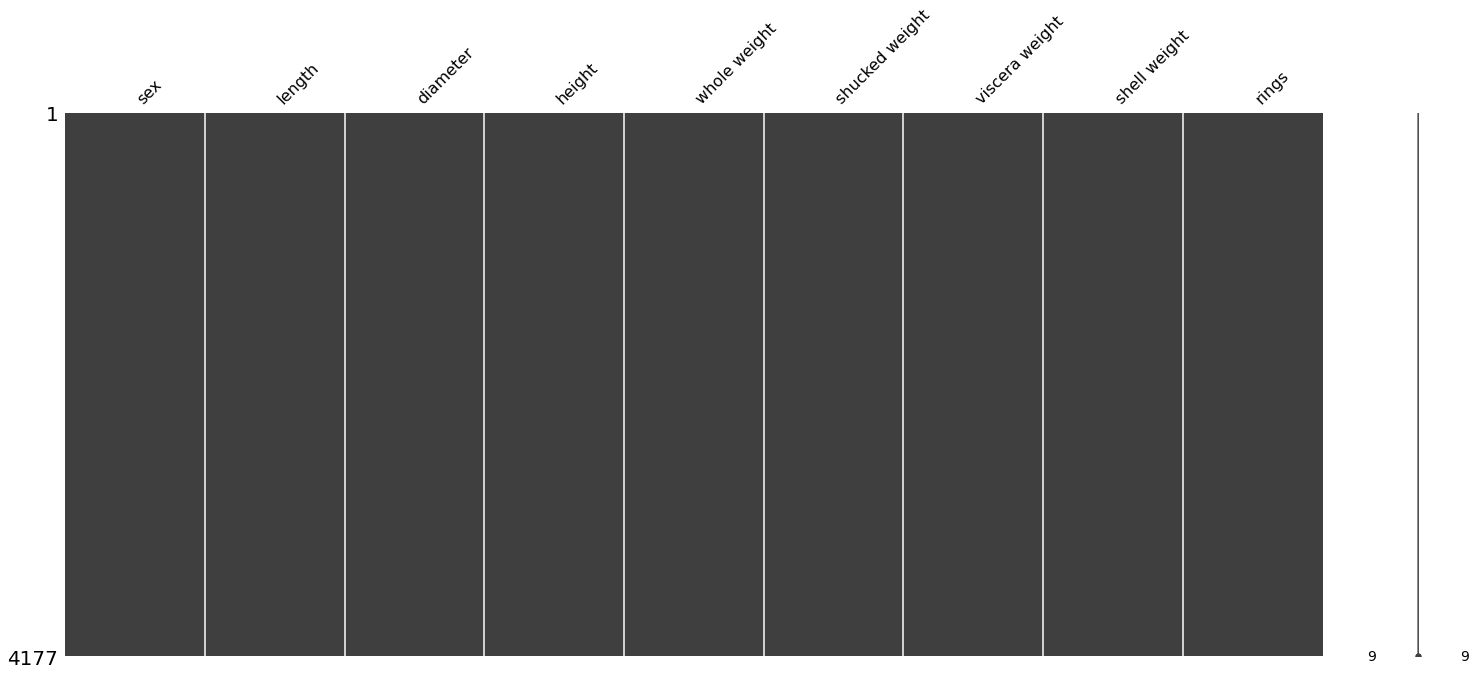

In [218]:
#Matrix com a distribuição de dados nulos.
msno.matrix(data)

In [219]:
#Tranformar dados catégoricos em binários
df_dummified = pd.get_dummies(data, columns=['sex'])
print(df_dummified)

      length  diameter  height  whole weight  ...  rings  sex_F  sex_I  sex_M
0      0.455     0.365   0.095        0.5140  ...     15      0      0      1
1      0.350     0.265   0.090        0.2255  ...      7      0      0      1
2      0.530     0.420   0.135        0.6770  ...      9      1      0      0
3      0.440     0.365   0.125        0.5160  ...     10      0      0      1
4      0.330     0.255   0.080        0.2050  ...      7      0      1      0
...      ...       ...     ...           ...  ...    ...    ...    ...    ...
4172   0.565     0.450   0.165        0.8870  ...     11      1      0      0
4173   0.590     0.440   0.135        0.9660  ...     10      0      0      1
4174   0.600     0.475   0.205        1.1760  ...      9      0      0      1
4175   0.625     0.485   0.150        1.0945  ...     10      1      0      0
4176   0.710     0.555   0.195        1.9485  ...     12      0      0      1

[4177 rows x 11 columns]


In [220]:
#Movendo a classe resposta do Dataset para a variável y
y = df_dummified.rings.values
del df_dummified["rings"]
X = df_dummified.values.astype(np.float)
df_dummified.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [221]:
#Dividindo a base em Treino(75%) e Teste(25%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [222]:
#Aplicando o KNN

#Definindo o valor de vizinhos
classifier = KNeighborsClassifier(n_neighbors=5)

#Treinar o modelo, com os dados de treinamento
classifier.fit(X_train, y_train)

#Prever os valores de y com dos dados de X_test
y_pred = classifier.predict(X_test)

In [223]:
# Imprimindo o relatório de classificação
print("Relatório de classificação KNN: \n", classification_report(y_test, y_pred))  

# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo KNN: ' , accuracy_score(y_test, y_pred))

Relatório de classificação KNN: 
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.25      0.24      0.24        17
           5       0.41      0.21      0.28        42
           6       0.27      0.43      0.33        75
           7       0.28      0.32      0.30       132
           8       0.25      0.33      0.28       176
           9       0.24      0.27      0.26       250
          10       0.20      0.28      0.23       199
          11       0.22      0.22      0.22       145
          12       0.04      0.02      0.03        89
          13       0.07      0.05      0.06        61
          14       0.07      0.02      0.03        44
          15       0.00      0.00      0.00        36
          16       0.11      0.03      0.05        29
          17       0.00      0.00      0.00        29
          18       0.00      0.00      0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


O desempenho do algoritmo KNN foi de 22,26%

In [210]:
#Aplicando a Árvore de Decição

#Instanciando o modelo
model = DecisionTreeClassifier()

# Treinar o modelo
model.fit(X_train, y_train)

# Aplicar o modelo ao treinamento e ao teste
predicted_test_y = model.predict(X_test)

predicted_train_y = model.predict(X_train)

In [224]:
#Imprimindo a acurácia do modelo
accuracy = accuracy_score(y_test, predicted_test_y) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

A acurácia foi de 10.01%.


In [225]:
#Aplicando uma Rede Neural

#Inicializando a rede
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(10,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history = model.fit(X_train,y_train,batch_size=100,epochs=5,verbose=1)
test=model.evaluate(X_test, y_test, verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               2816      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 257       
Total params: 200,449
Trainable params: 200,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
28/28 [==============================] - 1s 8ms/step - loss: 6.8071 - mean_absolute_error: 6.8071
Epoch 

In [ ]:
#Validando desempenho dos comitês